# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import pandas_datareader 
import plotly.express as px
import plotly.graph_objects as go

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [285]:
data = pd.read_excel('/Users/clarajensen/Desktop/Introduction to Programming and Numerical Analysis /projects-2023-mc/dataproject/data.xlsx')
data.head()

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,fdi,Inflation,QGDP,Inequality,id,t
0,Australia,2019Q3,0.00,11.8,13.03,10.22,-0.3,1.1,NaN,1.67,0.8,1,1,1
1,Australia,2019Q4,0.00,11.91,13.14,10.43,-6.9,-0.6,NaN,1.84,0.4,1,1,2
2,Australia,2020Q1,176.79,12,13.59,10.75,-5.7,-0.5,3316.8,2.19,-0.3,1,1,3
3,Australia,2020Q2,130.33,15.35,16.08,14.62,-2.7,-4.8,251.8,-0.35,-6.8,1,1,4
4,Australia,2020Q3,743.60,14.96,15.73,13.99,2.1,0.7,6965.3,0.69,3.4,1,1,5


In [286]:
data2=data.loc[:, data.columns != 'fdi']
print(data2)

           Country    year    Corona untotal  unmen  unwomen  trade  \
0       Australia   2019Q3      0.00    11.8  13.03    10.22   -0.3   
1       Australia   2019Q4      0.00   11.91  13.14    10.43   -6.9   
2       Australia   2020Q1    176.79      12  13.59    10.75   -5.7   
3       Australia   2020Q2    130.33   15.35  16.08    14.62   -2.7   
4       Australia   2020Q3    743.60   14.96  15.73    13.99    2.1   
..             ...     ...       ...     ...    ...      ...    ...   
337  United States  2020Q3  13807.03   15.57  15.90    15.20   23.0   
338  United States  2020Q4  38906.29      12  13.00    10.97    7.6   
339  United States  2021Q1  31167.54   11.03  11.97    10.13    6.3   
340  United States  2021Q2   9595.44   10.13  10.90     9.33    6.8   
341  United States  2021Q3  28991.92    9.37  10.30     8.40    1.0   

    Investment Inflation QGDP  Inequality  id  t  
0          1.1      1.67  0.8           1   1  1  
1         -0.6      1.84  0.4           1   1

In [287]:
I = data2.Country.str.contains('Australia')
I |= data2.Country.str.contains('Canada')
I |= data2.Country.str.contains('Chile')
I |= data2.Country.str.contains('Colombia')
I |= data2.Country.str.contains('Costa Rica')
I |= data2.Country.str.contains('Iceland')
I |= data2.Country.str.contains('Isreal')
I |= data2.Country.str.contains('Japan')
I |= data2.Country.str.contains('Korea')
I |= data2.Country.str.contains('Mexico')
I |= data2.Country.str.contains('New Zealand')
I |= data2.Country.str.contains('Norway')
I |= data2.Country.str.contains('Switzerland')
I |= data2.Country.str.contains('Turkey')
I |= data2.Country.str.contains('United Kingdom')
I |= data2.Country.str.contains('United States')

data2.loc[I, :]

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,Inflation,QGDP,Inequality,id,t
0,Australia,2019Q3,0.00,11.8,13.03,10.22,-0.3,1.1,1.67,0.8,1,1,1
1,Australia,2019Q4,0.00,11.91,13.14,10.43,-6.9,-0.6,1.84,0.4,1,1,2
2,Australia,2020Q1,176.79,12,13.59,10.75,-5.7,-0.5,2.19,-0.3,1,1,3
3,Australia,2020Q2,130.33,15.35,16.08,14.62,-2.7,-4.8,-0.35,-6.8,1,1,4
4,Australia,2020Q3,743.60,14.96,15.73,13.99,2.1,0.7,0.69,3.4,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,United States,2020Q3,13807.03,15.57,15.90,15.20,23.0,5.2,1.22,7.5,1,38,5
338,United States,2020Q4,38906.29,12,13.00,10.97,7.6,3.7,1.24,1.1,1,38,6
339,United States,2021Q1,31167.54,11.03,11.97,10.13,6.3,2.3,1.9,1.5,1,38,7
340,United States,2021Q2,9595.44,10.13,10.90,9.33,6.8,0.4,4.85,1.6,1,38,8


In [288]:
data2 = data2.loc[I == False] # keep everything else
data.head(10)

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,fdi,Inflation,QGDP,Inequality,id,t
0,Australia,2019Q3,0.00,11.8,13.03,10.22,-0.3,1.1,NaN,1.67,0.8,1,1,1
1,Australia,2019Q4,0.00,11.91,13.14,10.43,-6.9,-0.6,NaN,1.84,0.4,1,1,2
2,Australia,2020Q1,176.79,12,13.59,10.75,-5.7,-0.5,3316.8,2.19,-0.3,1,1,3
3,Australia,2020Q2,130.33,15.35,16.08,14.62,-2.7,-4.8,251.8,-0.35,-6.8,1,1,4
4,Australia,2020Q3,743.60,14.96,15.73,13.99,2.1,0.7,6965.3,0.69,3.4,1,1,5
5,Australia,2020Q4,51.54,15.07,15.91,13.93,12.0,3.7,1713.8,0.86,3.3,1,1,6
6,Australia,2021Q1,34.78,12.86,14.90,11.18,17.6,5,-4021.5,1.11,1.8,1,1,7
7,Australia,2021Q2,49.63,10.48,12.35,8.60,10.3,3.2,-2200.9,3.85,0.7,1,1,8
8,Australia,2021Q3,2889.73,10.56,11.03,9.76,2.5,0.2,NaN,3.01,-1.9,1,1,9
9,Austria,2019Q3,0.00,9.83,10.50,8.97,-1.8,0.2,5652.1,1.39,0.3,0,2,1


In [289]:
data2.reset_index(inplace = True, drop = True) # Drop old index too
data2.iloc[0:300,:]

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,Inflation,QGDP,Inequality,id,t
0,Austria,2019Q3,0.00,9.83,10.50,8.97,-1.8,0.2,1.39,0.3,0,2,1
1,Austria,2019Q4,0.00,9.17,10.47,7.73,-0.7,-0.4,1.32,-0.3,0,2,2
2,Austria,2020Q1,1125.72,10.1,11.13,8.90,-1.1,-2.3,1.87,-2.5,0,2,3
3,Austria,2020Q2,838.87,14.3,15.27,13.17,-16.5,-8.5,1.04,-11.4,0,2,4
4,Austria,2020Q3,2990.91,11.57,12.40,10.53,21.6,8.4,1.41,10.9,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Sweden,2020Q3,2443.59,26.57,27.73,25.30,17.1,5,0.57,6.9,0,34,5
203,Sweden,2020Q4,33908.52,23.67,24.67,22.67,6.1,0.1,0.32,0.3,0,34,6
204,Sweden,2021Q1,36171.38,23.53,25.23,23.80,6.3,0.7,1.54,1.2,0,34,7
205,Sweden,2021Q2,28036.67,25.87,27.73,23.90,9.0,4.1,1.8,1,0,34,8


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

Explain what you see when moving elements of the interactive plot around. 

In [290]:
T = data2.year.str.contains('2021Q2')
data2.loc[T, :]

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,Inflation,QGDP,Inequality,id,t
7,Austria,2021Q2,11514.23,12,12.10,11.90,2.3,0.8,2.51,4.2,0,2,8
16,Belgium,2021Q2,17373.73,19.2,18.00,20.70,11.6,1.3,1.44,1.7,0,3,8
25,Czech Republic,2021Q2,12567.70,7.83,7.40,8.57,3.0,4.3,2.9,1.3,0,8,8
34,Denmark,2021Q2,10791.46,10.3,NaN,NaN,4.1,-2.6,1.65,1.3,0,9,8
43,Estonia,2021Q2,18566.42,17.57,15.93,19.07,7.6,-1.1,3.08,2.3,0,10,8
52,Finland,2021Q2,3232.49,18.8,21.07,18.13,5.8,1,2.09,2,0,11,8
61,France,2021Q2,16766.01,19.7,19.23,20.23,1.6,2.4,1.38,1.3,0,12,8
70,Germany,2021Q2,10628.72,7.13,7.50,6.70,1.5,1.2,2.29,1.7,0,13,8
79,Greece,2021Q2,15248.66,38.73,34.94,43.77,3.9,4.7,2.29,2.1,1,14,8
88,Hungary,2021Q2,16155.32,13.8,11.80,16.50,0.6,3.7,5.19,2,0,15,8


In [291]:
data3 = data2.loc[T == True] # keep everything else

In [292]:
data3.reset_index(inplace = True, drop = True) # Drop old index too
data3.iloc[0:300,:]

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,Inflation,QGDP,Inequality,id,t
0,Austria,2021Q2,11514.23,12,12.10,11.90,2.3,0.8,2.51,4.2,0,2,8
1,Belgium,2021Q2,17373.73,19.2,18.00,20.70,11.6,1.3,1.44,1.7,0,3,8
2,Czech Republic,2021Q2,12567.70,7.83,7.40,8.57,3.0,4.3,2.9,1.3,0,8,8
3,Denmark,2021Q2,10791.46,10.3,NaN,NaN,4.1,-2.6,1.65,1.3,0,9,8
4,Estonia,2021Q2,18566.42,17.57,15.93,19.07,7.6,-1.1,3.08,2.3,0,10,8
5,Finland,2021Q2,3232.49,18.8,21.07,18.13,5.8,1,2.09,2,0,11,8
6,France,2021Q2,16766.01,19.7,19.23,20.23,1.6,2.4,1.38,1.3,0,12,8
7,Germany,2021Q2,10628.72,7.13,7.50,6.70,1.5,1.2,2.29,1.7,0,13,8
8,Greece,2021Q2,15248.66,38.73,34.94,43.77,3.9,4.7,2.29,2.1,1,14,8
9,Hungary,2021Q2,16155.32,13.8,11.80,16.50,0.6,3.7,5.19,2,0,15,8


In [296]:
# Create scatterplot
fig = px.scatter(data_frame=data3, x='Corona', y='untotal', trendline="ols")

# Customize layout
fig.update_layout(
    title='Corona cases and unemployment rate for 2021Q2',
    xaxis_title='Corona cases',
    yaxis_title='Unemployment'
)

# Show scatterplot
fig.show()

<AxesSubplot:xlabel='Corona'>

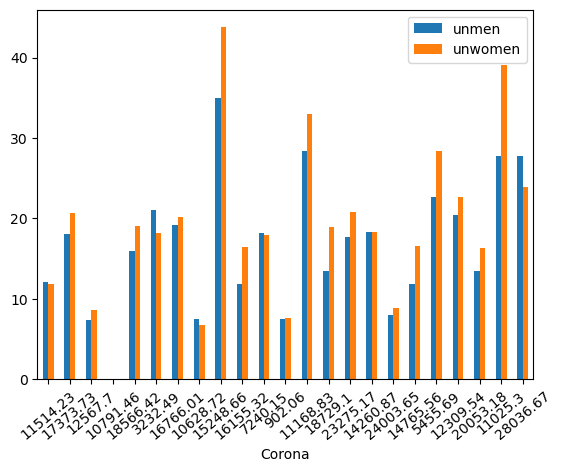

In [302]:
fig, ax = plt.subplots()
data3.plot.bar(x = 'Corona', y = ['unmen', 'unwomen'], rot = 40, ax = ax)

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.